In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from collections import namedtuple
from keras.models import load_model
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import imutils
import cv2
import os
import numpy as np

In [3]:
Bounding_Box = namedtuple('Bounding_Box', 'xmin ymin xmax ymax')

def building_bounding_box(path_xml_annotation):
    tree = ET.parse(path_xml_annotation)
    root = tree.getroot()
    path_to_box = './object/bndbox/'
    xmin = int(root.find(path_to_box + "xmin").text)
    ymin = int(root.find(path_to_box + "ymin").text)
    xmax = int(root.find(path_to_box + "xmax").text)
    ymax = int(root.find(path_to_box + "ymax").text)
    return Bounding_Box(xmin, ymin, xmax, ymax)

In [4]:
def plot_with_box(image_data, bounding_box, compare_box=None):
    fig, ax = plt.subplots(1)
    ax.imshow(image_data)

    boxA = patches.Rectangle((bounding_box.xmin, bounding_box.ymin),
                             bounding_box.xmax - bounding_box.xmin,
                             bounding_box.ymax - bounding_box.ymin,
                             linewidth=3, edgecolor='y', facecolor='none')
    
    ax.add_patch(boxA)
    
    if compare_box is not None:
        boxB = patches.Rectangle((compare_box.xmin, compare_box.ymin),
                                 compare_box.xmax - compare_box.xmin,
                                 compare_box.ymax - compare_box.ymin,
                                 linewidth=2, edgecolor='b', facecolor='none')
        
        ax.add_patch(boxB)

        xA = max(bounding_box.xmin, compare_box.xmin)
        yA = max(bounding_box.ymin, compare_box.ymin)
        xB = min(bounding_box.xmax, compare_box.xmax)
        yB = max(bounding_box.ymax, compare_box.ymax)
        interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
        boxAArea = (bounding_box.xmax - bounding_box.xmin + 1) * (bounding_box.ymax - bounding_box.ymin + 1)
        boxBArea = (compare_box.xmax - compare_box.xmin + 1) * (compare_box.ymax - compare_box.ymin + 1)
        iou = interArea / float(boxAArea + boxBArea - interArea)
        
        print('intersection of union =', iou)
    plt.show()

# Testing with new image downloaded as random from Google images

Number of images 19
image19.jpg
it is a Cat


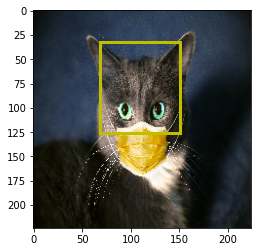

image18.jpg
it is a Cat


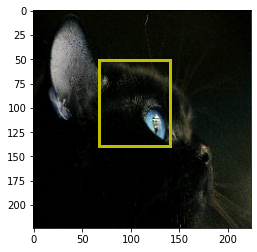

image17.jpeg
it is a dog


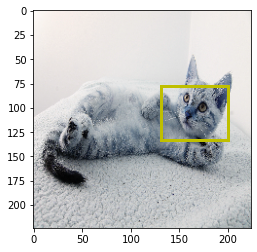

image16.jpg
it is a Cat


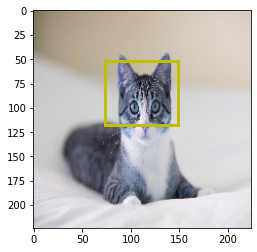

image15.jpg
it is a Cat


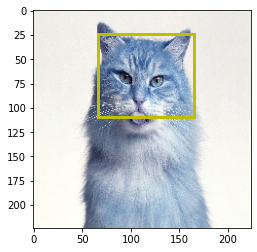

image14.png
it is a Cat


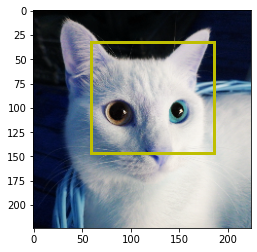

image13.jpg
it is a Cat


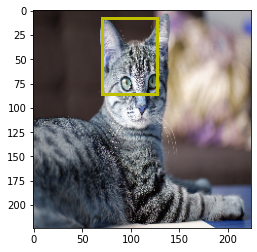

image12.png
it is a Cat


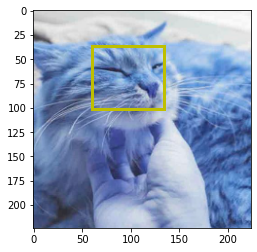

image11.png
it is a Cat


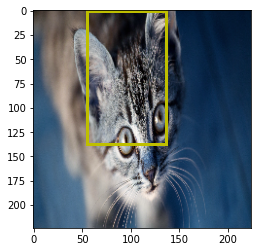

image9.jpg
it is a dog


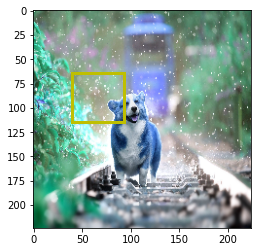

image10.jpeg
it is a dog


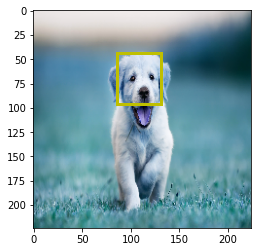

image6.jpg
it is a Cat


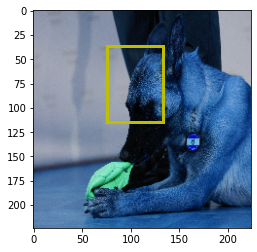

image8.jpeg
it is a dog


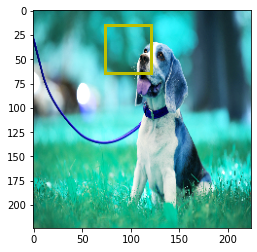

image7.jpeg
it is a Cat


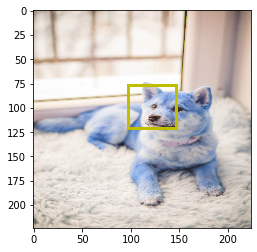

image3.jpg
it is a dog


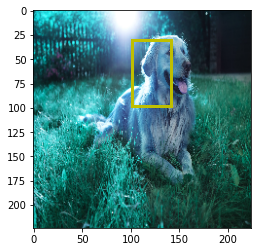

image5.jpg
it is a dog


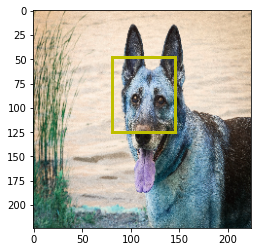

image4.jpg
it is a dog


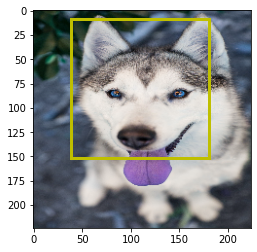

image2.jpg
it is a Cat


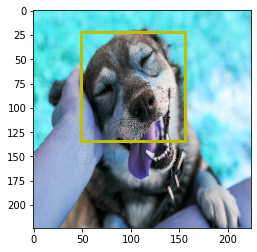

image1.jpeg
it is a dog


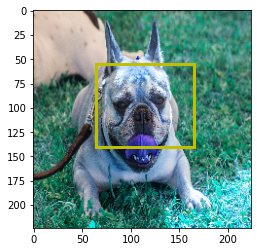

8
11


In [5]:
# load model
model = load_model('/content/drive/MyDrive/DataScience/SigTupleAssignment/Oxford_PetDataset/models/model_mobilenet_16epo.h5')

local_download_path = '/content/drive/MyDrive/DataScience/SigTupleAssignment/Oxford_PetDataset/predict/'

dogs = 0
cats = 0
for dirpath,_,filenames in os.walk(local_download_path):
  print(f'Number of images {len(filenames)}')
  for f in filenames:
    print(f)
    path_to_image = os.path.abspath(os.path.join(dirpath, f))

    image = cv2.imread(path_to_image)
    resized = cv2.resize(image, (224, 224))

    pred = model.predict(np.array([preprocess_input(resized)]))
    if pred[0][0] < .5:
      print("it is a Cat")
      cats += 1
    else:
      print("it is a dog")
      dogs += 1
    plot_with_box(resized, Bounding_Box(*pred[1][0]))

print(dogs)
print(cats)